In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("df_clustering.csv")

In [3]:
df

,word,length,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy
0,abattoir,8,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0
1,abbey,5,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0
2,abbreviate,10,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0
3,abdicate,8,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0
4,abdication,10,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0
...,...,...,...,...,...,...,...,...,...,...,...
4663,zeppelin,8,6.185,5.000,5.333,6.286,3.167,6.036,5.464,5.269,0
4664,zero,4,4.031,4.182,4.567,2.688,6.269,2.636,1.758,4.172,0
4665,zest,4,5.969,6.818,6.121,4.438,4.000,5.364,2.636,3.452,0
4666,zoo,3,5.909,6.235,5.485,6.118,5.655,2.324,4.844,4.059,0


In [4]:
df_train = df.copy()
df_polysemy = df["polysemy"]

In [5]:
df_train = df_train.drop(['word', "polysemy", "length"], axis=1)


In [6]:
df_train

,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender
0,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391
1,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303
2,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971
3,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167
4,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571
...,...,...,...,...,...,...,...,...
4663,6.185,5.000,5.333,6.286,3.167,6.036,5.464,5.269
4664,4.031,4.182,4.567,2.688,6.269,2.636,1.758,4.172
4665,5.969,6.818,6.121,4.438,4.000,5.364,2.636,3.452
4666,5.909,6.235,5.485,6.118,5.655,2.324,4.844,4.059


In [7]:
#scaling 
scaler = MinMaxScaler()
X = scaler.fit_transform(df_train)

In [8]:
X

array([[0.3501634 , 0.24077721, 0.37200622, ..., 0.98663493, 0.59183673,
        0.73538771],
       [0.1745098 , 0.62373638, 0.42395023, ..., 0.69681435, 0.67653964,
        0.38569754],
       [0.19869281, 0.55402389, 0.51228616, ..., 0.76382278, 0.23333935,
        0.4975716 ],
       ...,
       [0.63921569, 0.75987922, 0.65007776, ..., 0.7310509 , 0.22774065,
        0.41065148],
       [0.62941176, 0.6833399 , 0.55116641, ..., 0.17447821, 0.62651255,
        0.5123095 ],
       [0.41078431, 0.62163581, 0.49346812, ..., 0.81526913, 0.57720787,
        0.44498409]])

## KMEANS

In [9]:
sse = []
kmax = 20
for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(X)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(X)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(X)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)

sse

KeyboardInterrupt: 

In [ ]:
#cambiare dimensioni figura
plt.plot(range(2,kmax+2), sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=20, max_iter=100, random_state = 20)
kmeans.fit(X)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('ssw', kmeans.inertia_)
print('silhouette', silhouette_score(X, kmeans.labels_))

In [ ]:
df_train.columns

In [ ]:
plt.figure(figsize=(8, 5))  

for i in range(0, 3):
    plt.plot(range(0, 8), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=2, marker = "o")
plt.xticks(range(0, 8), list(df_train.columns))
plt.legend()
plt.title("Parallel Coordinates K-Means")
plt.xticks (rotation = 30)
plt.show()

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
#provare le diverse combinazioni
plt.scatter(df['valence'], df['concreteness'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='o', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

In [ ]:
#provare le diverse combinazioni
plt.scatter(df['familiarity'], df['concreteness'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 2], centers[:, 1], s=100, marker='o', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

In [ ]:
#provare le diverse combinazioni
plt.scatter(df['aoa'], df['familiarity'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='o', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(c)
plt.show()
centers

In [ ]:
#provare le diverse combinazioni
plt.scatter(df['dominance'], df['valence'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='o', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.title("Scatter plot dominance/valence and K-Means centroids")
plt.show()
centers

In [47]:
df_c = df_train.join(df_polysemy)
df_c.head()

,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy
0,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0
1,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0
2,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0
3,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0
4,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0


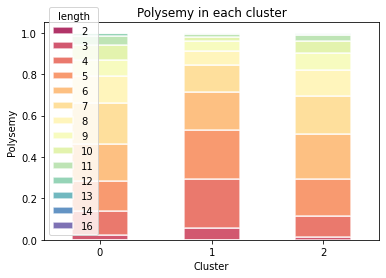

In [71]:
df['kmeans_labels'] = kmeans.labels_

bar_pl = df['length'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8,cmap = "Spectral", edgecolor='white', linewidth=1.5)

plt.xlabel('Cluster')
plt.ylabel('Polysemy')
plt.title("Polysemy in each cluster")
plt.xticks(rotation = 0)
plt.show()

## Gerarchico

Text(0.5, 1.0, 'Dendrogram - complete')

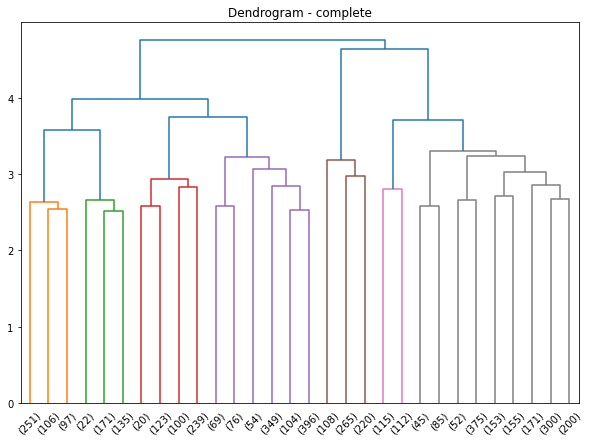

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10, 7))  
data_dist = pdist(X, metric='cityblock')
data_link = linkage(data_dist, method='complete')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title("Dendrogram - complete")

Text(0.5, 1.0, 'Dendrogram - Ward')

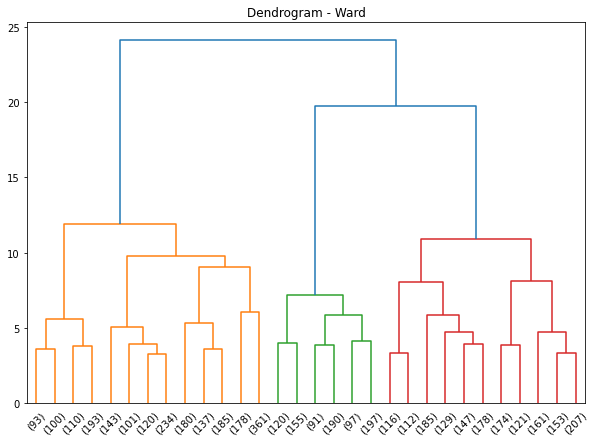

In [90]:
plt.figure(figsize=(10, 7))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title("Dendrogram - Ward")

Text(0.5, 1.0, 'Dendrogram - average')

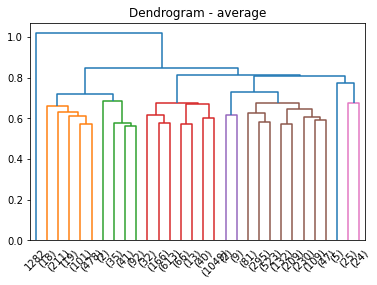

In [91]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title("Dendrogram - average")

Text(0.5, 1.0, 'Dendrogram - single link')

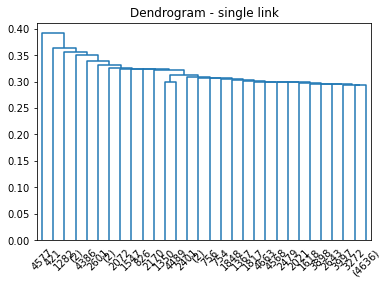

In [92]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title("Dendrogram - single link")

### prove con il train

In [18]:
connectivity = kneighbors_graph(X, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [19]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, ward.labels_))

ward
labels {0: 2135, 1: 1683, 2: 850}
silhouette 0.1940178886534592


In [20]:
print ('complete - euclidean')
complete = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
complete.fit(X)

hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, complete.labels_))

complete - euclidean
labels {0: 683, 1: 168, 2: 3817}
silhouette 0.0003151171076222725


In [25]:
print ('complete - manhattan')
completeM = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='manhattan',
                                   connectivity=connectivity)
completeM.fit(X)

hist, bins = np.histogram(completeM.labels_, bins=range(0, len(set(completeM.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, completeM.labels_))

complete - manhattan
labels {0: 3782, 1: 637, 2: 249}
silhouette -0.009364020040890814


In [29]:
print ('average - euclidean')
average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
average.fit(X)

hist, bins = np.histogram(average.labels_, bins=range(0, len(set(average.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, average.labels_))

average - euclidean
labels {0: 4667, 1: 1}
silhouette 0.23599778795305174


In [98]:
print ('average - manhattan')
averageM = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='manhattan',
                                   connectivity=connectivity)
averageM.fit(X)

hist, bins = np.histogram(averageM.labels_, bins=range(0, len(set(averageM.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, averageM.labels_))

average - manhattan
labels {0: 4667, 1: 1}
silhouette 0.24993064003071358


In [35]:
print ('Single link - euclidean')
averageM = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='euclidean',
                                   connectivity=connectivity)
averageM.fit(X)

hist, bins = np.histogram(averageM.labels_, bins=range(0, len(set(averageM.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X, averageM.labels_))

Single link - euclidean
labels {0: 4667, 1: 1}
silhouette 0.18535037727305184


## DBSCAN

In [59]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

k=5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

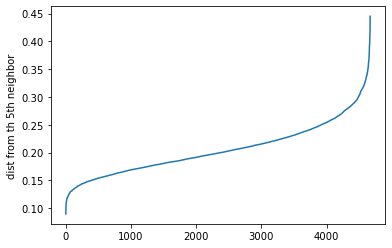

In [60]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')
plt.show()

In [63]:
# density based clustering

#mettere in altre celle le prove cambiando metric e min_samples
dbscan = DBSCAN(eps=0.30, min_samples=3, metric='euclidean')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(X, dbscan.labels_))

labels {-1: 23, 0: 4645, 1: 0}
silhouette 0.14690348890501206


In [66]:
dbscan = DBSCAN(eps=0.30, min_samples=3, metric='manhattan')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(X, dbscan.labels_))

labels {-1: 3614, 0: 159, 1: 9, 2: 5, 3: 7, 4: 6, 5: 6, 6: 6, 7: 7, 8: 21, 9: 11, 10: 13, 11: 3, 12: 4, 13: 340, 14: 4, 15: 10, 16: 18, 17: 4, 18: 4, 19: 5, 20: 10, 21: 3, 22: 10, 23: 3, 24: 4, 25: 3, 26: 3, 27: 3, 28: 3, 29: 5, 30: 4, 31: 3, 32: 5, 33: 3, 34: 7, 35: 5, 36: 6, 37: 4, 38: 6, 39: 6, 40: 5, 41: 5, 42: 6, 43: 3, 44: 5, 45: 5, 46: 13, 47: 3, 48: 6, 49: 8, 50: 6, 51: 3, 52: 4, 53: 6, 54: 14, 55: 3, 56: 4, 57: 3, 58: 4, 59: 5, 60: 6, 61: 4, 62: 3, 63: 6, 64: 3, 65: 4, 66: 6, 67: 5, 68: 6, 69: 5, 70: 6, 71: 3, 72: 7, 73: 4, 74: 3, 75: 5, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 5, 88: 6, 89: 4, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 4, 99: 3, 100: 3, 101: 3, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 4, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 0}
silhouette -0.47966997480583906


In [65]:
df["DBSCAN labels"] = dbscan.labels_

In [ ]:
# density based clustering

#mettere in altre celle le prove cambiando metric e min_samples
dbscan = DBSCAN(eps=0.30, min_samples=5, metric='l1')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(X, dbscan.labels_))

In [67]:
# density based clustering

#mettere in altre celle le prove cambiando metric e min_samples
dbscan = DBSCAN(eps=0.30, min_samples=5, metric='manhattan')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(X, dbscan.labels_))

labels {-1: 4243, 0: 206, 1: 6, 2: 5, 3: 9, 4: 6, 5: 11, 6: 10, 7: 5, 8: 23, 9: 17, 10: 5, 11: 5, 12: 5, 13: 5, 14: 9, 15: 22, 16: 5, 17: 8, 18: 9, 19: 5, 20: 5, 21: 4, 22: 9, 23: 5, 24: 7, 25: 5, 26: 5, 27: 4, 28: 5, 29: 0}
silhouette -0.4677162283014712


In [71]:
# density based clustering

#mettere in altre celle le prove cambiando metric e min_samples
dbscan = DBSCAN(eps=0.30, min_samples=3, metric='euclidean')
dbscan.fit(X)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print( 'silhouette', silhouette_score(X, dbscan.labels_))

labels {-1: 23, 0: 4645, 1: 0}
silhouette 0.14690348890501206


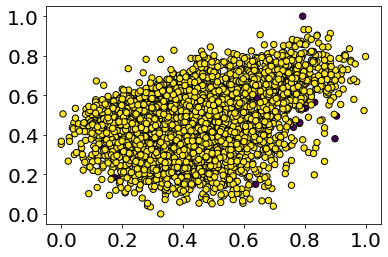

In [77]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [78]:
from sklearn.cluster import OPTICS

In [79]:
optics = OPTICS(min_samples=3, max_eps=np.inf)
optics.fit(X)

OPTICS(min_samples=3)

In [80]:
optics.labels_[:20]

array([ -1, 202,  -1,  -1,  -1,  -1,  -1, 185, 185,  -1, 153,  -1,  -1,
       119, 155,  -1,  -1,  -1,  -1,  -1])

In [81]:
np.unique(optics.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [82]:
i = df_train.columns.values.tolist().index('semsize')
j = df_train.columns.values.tolist().index('aoa')

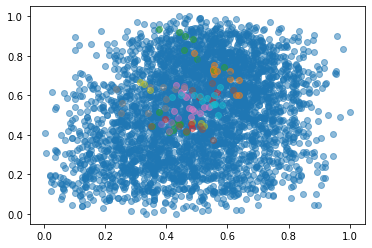

In [83]:
for cluster_id in np.unique(optics.labels_)[:20]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.5)

In [84]:
df['optics_labels'] = optics.labels_


In [85]:
df.optics_labels.value_counts()

-1      3671
 81       10
 118      10
 176      10
 185      10
        ... 
 26        3
 10        3
 2         3
 229       3
 237       3
Name: optics_labels, Length: 239, dtype: int64

In [86]:
df[df["polysemy"] == 1]["optics_labels"].value_counts()

-1      296
 81       3
 72       2
 47       2
 46       2
       ... 
 90       1
 234      1
 212      1
 76       1
 237      1
Name: optics_labels, Length: 65, dtype: int64

In [87]:
df[df["polysemy"] == 1]["DBSCAN labels"].value_counts()

0    379
Name: DBSCAN labels, dtype: int64

In [76]:
df[df["polysemy"] == 1]["kmeans_labels"].value_counts()

1    252
2     70
0     57
Name: kmeans_labels, dtype: int64